<a href="https://colab.research.google.com/github/austinvanderlyn/School-Files/blob/master/T1Chapter5MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


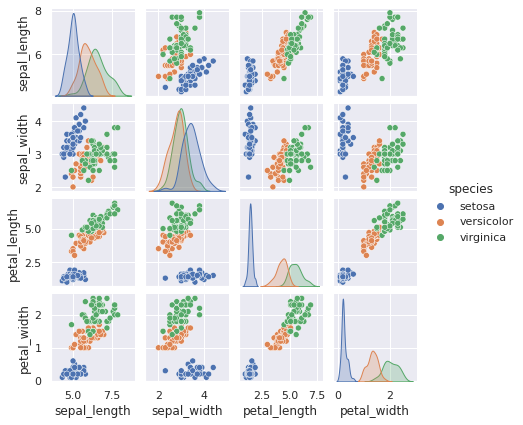

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris,
             hue = "species",
             size = 1.5)

In [3]:
X_iris = iris.drop("species",
                   axis = 1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris["species"]
y_iris.shape

(150,)

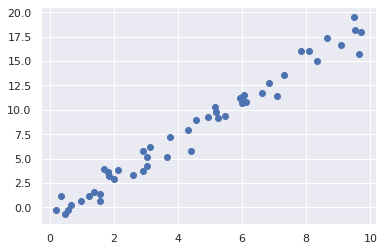

In [5]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [9]:
model.fit(X, y)

LinearRegression()

In [10]:
model.coef_

array([1.9776566])

In [11]:
model.intercept_

-0.9033107255311146

In [12]:
xfit = np.linspace(-1, 11)

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

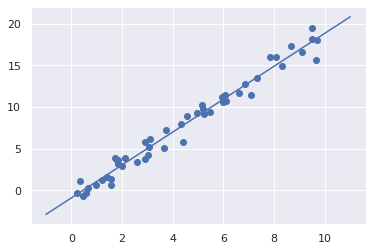

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state = 1)

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [18]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


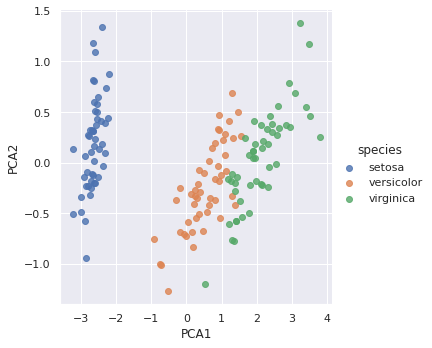

In [19]:
iris["PCA1"] = X_2D[:, 0]
iris["PCA2"] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2",
           hue = "species",
           data = iris,
           fit_reg = False)

In [20]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components = 3,
            covariance_type = "full")
model.fit(X_iris)
y_gmm = model.predict(X_iris)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


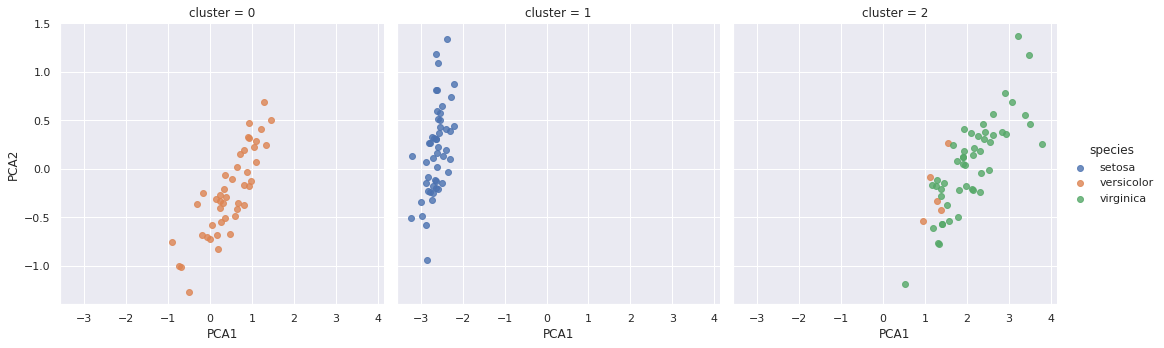

In [21]:
iris["cluster"] = y_gmm
sns.lmplot("PCA1", "PCA2",
           data = iris,
           hue = "species",
           col = "cluster",
           fit_reg = False)

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

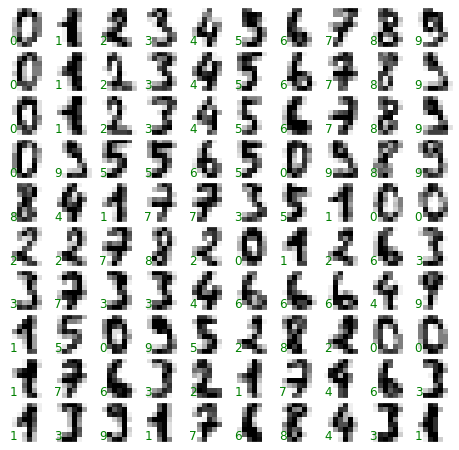

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10,
                         figsize = (8, 8),
                         subplot_kw = {"xticks":[], "yticks":[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i],
            cmap = "binary",
            interpolation = "nearest")
  ax.text(0.05, 0.05,
          str(digits.target[i]),
              transform = ax.transAxes,
              color = "green")

In [24]:
X = digits.data
X.shape

(1797, 64)

In [25]:
y = digits.target
y.shape

(1797,)

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

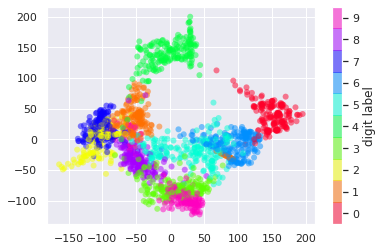

In [27]:
plt.scatter(data_projected[:, 0],
            data_projected[:, 1],
            c = digits.target,
            edgecolor = "none",
            alpha = 0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.colorbar(label = "digit label", ticks = range(10))
plt.clim(-0.5, 9.5)

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

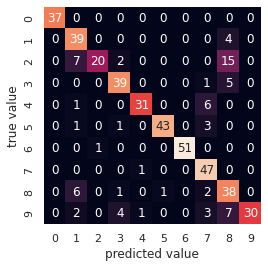

In [31]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat,
            square = True,
            annot = True,
            cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

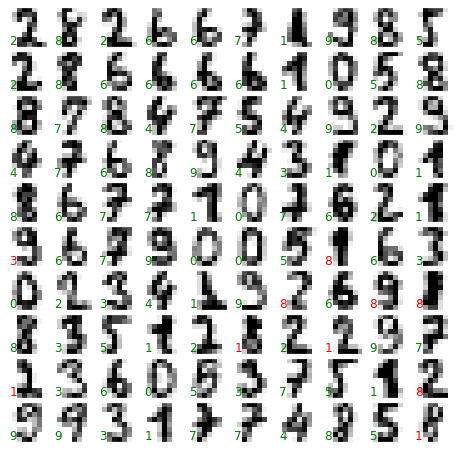

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [35]:
model.fit(X, y)
y_model = model.predict(X)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [37]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y,
                                  random_state = 0,
                                  train_size = 0.5)

In [38]:
model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [39]:
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [40]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [42]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

TypeError: ignored

In [ ]:
scores.mean()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2,
                         **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                       LinearRegression(**kwargs))

In [ ]:
import numpy as np

def make_data(N, err = 1.0, rseed = 1):
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  y = 10 - 1/(X.ravel() + 0.1)
  if err > 0:
    y += err * rng.randn(N)
  return X, y

X, y = make_data(40)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = "black")
axis = plt.axis()
for degree in [1, 3, 5]:
  y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
  plt.plot(X_test.ravel(), y_test, label = "degree = {0}".format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = "best")

In [ ]:
from sklearn.utils import validation
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, degree)


In [ ]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

In [ ]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False,
                     dtype = int)
vec.fit_transform(data)

In [ ]:
vec.get_feature_names()

In [ ]:
vec = DictVectorizer(sparse = True, 
                     dtype = int)
vec.fit_transform(data)

In [ ]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

In [ ]:
import pandas as pd
pd.DataFrame(X.toarray(),
             columns = vec.get_feature_names())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(),
             columns = vec.get_feature_names())

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)

In [ ]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,
                          include_bias = False)
X2 = poly.fit_transform(X)
print(X2)

In [ ]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

In [ ]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "mean")
X2 = imp.fit_transform(X)
X2

In [ ]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy = "mean"),
                      PolynomialFeatures(degree = 2),
                      LinearRegression())

In [ ]:
model.fit(X, y)
print(y)
print(model.predict(X))

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2,
                  centers = 2,
                  random_state = 2,
                  cluster_std = 1.5)
plt.scatter(X[:, 0], X[:, 1],
            c = y,
            s = 50,
            cmap = "RdBu")

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

In [ ]:
plt.scatter(X[:, 0], X[:, 1],
            c = y,
            s = 50,
            cmap = "RdBu")
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1],
            c = ynew,
            s = 20,
            cmap = "RdBu",
            alpha = 0.1)
plt.axis(lim)

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset = "train",
                           categories = categories)
test = fetch_20newsgroups(subset = "test",
                          categories = categories)

In [ ]:
print(train.data[5])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),
                      MultinomialNB())

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T,
            square = True,
            annot = True,
            fmt = "d",
            cbar = False,
            xticklabels = train.target_names,
            yticklabels = train.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")

In [ ]:
def predict_category(s, train = train, model = model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [ ]:
predict_category("sending a payload to the ISS")

In [ ]:
predict_category("discussing islam vs atheism")

In [ ]:
predict_category("determining the screen resolution")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.rand(50)
plt.scatter(x, y)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [ ]:
print("Model Slope:", model.coef_[0])
print("Model Intercept:", model.intercept_)

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2, 1])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:, None])

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(P)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 50,
                  centers = 2,
                  random_state = 0,
                  cluster_std = 0.60)
plt.scatter(X[:, 0], X[:, 1],
            c = y,
            s = 50,
            cmap = "autumn")

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1],
            c = y,
            s = 50,
            cmap = "autumn")
plt.plot([0.6], [2.1],
         "x",
         color = "red",
         markeredgewidth = 2,
         markersize = 10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m*xfit+b, "-k")

plt.xlim(-1, 3.5)

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = "linear",
            C = 1E10)
model.fit(X, y)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1],
            c = y,
            s = 50,
            cmap = "autumn")
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm,
         N = [10, 200],
         ax = fixed(None))

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor = .1, noise = .1)

clf = SVC(kernel = "linear").fit(X, y)

plt.scatter(X[:, 0], X[:, 1],
            c = y,
            s = 50,
            cmap = "autumn")
plot_svc_decision_function(clf, plot_support=False)

In [ ]:
r = np.exp(-(X ** 2).sum(1))

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

In [ ]:
clf = SVC(kernel = "rbf",
          C = 1E6)
clf.fit(X, y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s = 300,
            lw = 1,
            facecolors = "none")

In [ ]:
X, y = make_blobs(n_samples = 100,
                  centers = 2,
                  random_state = 0,
                  cluster_std = 1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap = "bone")
  axi.set(xticks = [], yticks = [],
          xlabel = faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components = 150,
                    whiten = True,
                    random_state = 42)
svc = SVC(kernel = "rbf",
          class_weight = "balanced")
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data,
                                                faces.target,
                                                random_state = 42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62, 47), cmap = "bone")
  axi.set(xticks = [], yticks = [])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                 color = "black" if yfit[i] == ytest[i] else "red")
fig.suptitle("Predicted Names: Incorrect Labels in Red", size = 14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names = faces.target_names))

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T,
            square = True, 
            annot = True,
            fmt = "d",
            cbar = False,
            xticklabels = faces.target_names,
            yticklabels = faces.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 300,
                  centers = 4,
                  random_state = 0,
                  cluster_std = 1.0)
plt.scatter(X[:, 0], X[:, 1],
            c = y,
            s = 50,
            cmap = "rainbow")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree,
                        n_estimators = 100,
                        max_samples = 0.8,
                        random_state = 1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 0)
visualize_classifier(model, X, y)

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

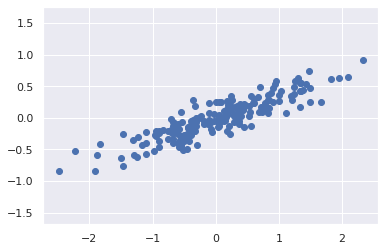

In [44]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2),
           rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis("equal")

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [46]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [47]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

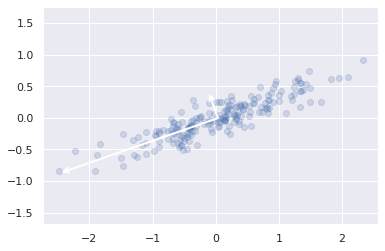

In [48]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis("equal")

In [49]:
pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:  ", X.shape)
print("transformed shape:  ", X_pca.shape)

original shape:   (200, 2)
transformed shape:   (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

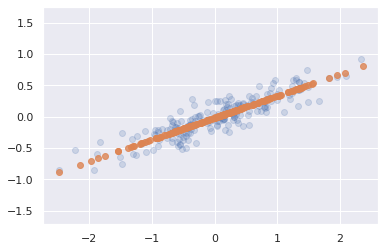

In [50]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.8)
plt.axis("equal")

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [52]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


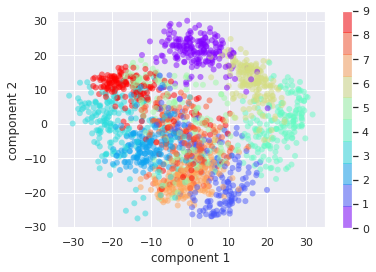

In [53]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0, 0.5, 'cumulative explained variance')

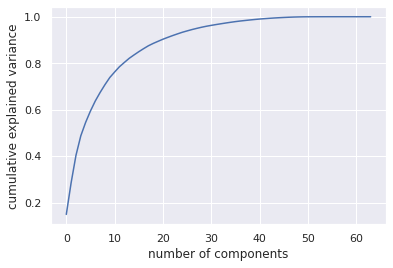

In [54]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

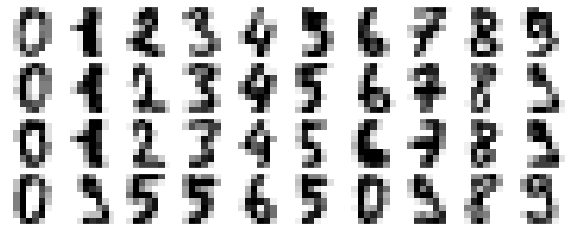

In [55]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

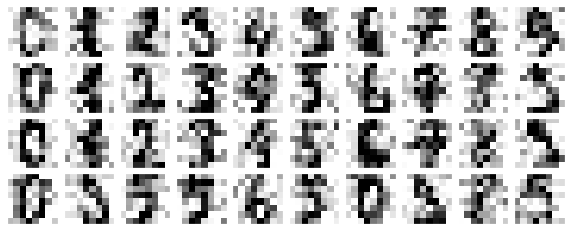

In [56]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [57]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

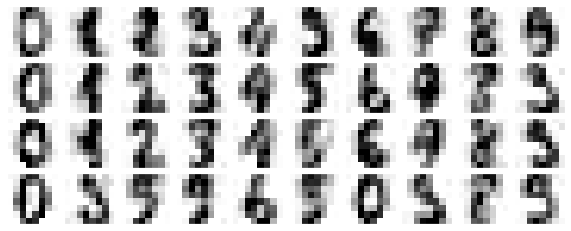

In [58]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)